### Imports

In [1]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from transformer import SpaceTimeFormer

### Artificial Time Series

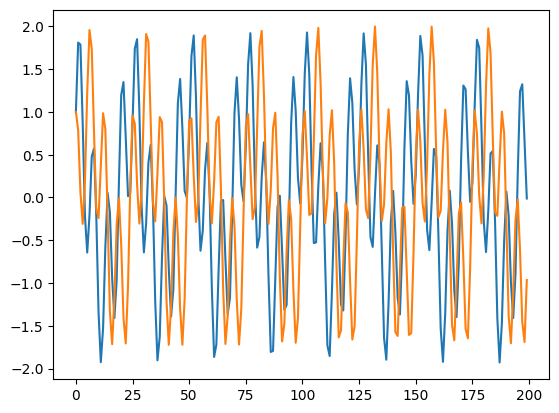

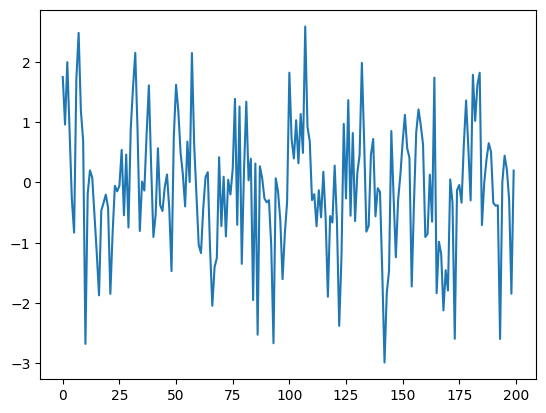

In [2]:
sequence_souce = np.zeros((2,200))
sequence_target = np.zeros((1,200))
sequence_souce[0,:] = np.sin(np.arange(0,200,1))+np.cos(np.arange(0,50,0.25))
sequence_souce[1,:] = np.cos(np.arange(0,200,1))+np.sin(np.arange(0,50,0.25))
sequence_target[0,:] = 0.3*sequence_souce[0,:]+0.7*sequence_souce[1,:]+np.random.normal(0,0.8,200)
plt.plot(sequence_souce[0,:])
plt.plot(sequence_souce[1,:])
plt.show()
plt.plot(sequence_target[0,:])
plt.show()

### Test Data Loader

In [3]:
from utils import load_src_trg

In [4]:
data_iter = load_src_trg(sequence_souce, sequence_target, 5, 5, 2)

In [5]:
for src, trg, trg_y in data_iter:
    print(np.shape(src))
    print(src)
    print(trg)
    print(trg_y)
    break

torch.Size([2, 2, 5])
tensor([[[ 1.0000,  1.8104,  1.7869,  0.8728, -0.2165],
         [ 1.0000,  0.7877,  0.0633, -0.3084,  0.1878]],

        [[ 1.8104,  1.7869,  0.8728, -0.2165, -0.6436],
         [ 0.7877,  0.0633, -0.3084,  0.1878,  1.2326]]], dtype=torch.float64)
tensor([[[-0.2751, -0.8323,  1.7149,  2.4782,  1.1848]],

        [[-0.8323,  1.7149,  2.4782,  1.1848,  0.6906]]], dtype=torch.float64)
tensor([[[-0.8323,  1.7149,  2.4782,  1.1848,  0.6906]],

        [[ 1.7149,  2.4782,  1.1848,  0.6906, -2.6763]]], dtype=torch.float64)


### Test Training

In [6]:
split = 0.8
pred_window = 5
sequence_source_train = sequence_souce[:, :int(np.shape(sequence_souce)[1]*split)]
sequence_source_test = sequence_souce[:, int(np.shape(sequence_souce)[1]*split):]
sequence_target_train = sequence_target[:, :int(np.shape(sequence_target)[1]*split)]
sequence_target_test = sequence_target[:, int(np.shape(sequence_target)[1]*split):]

In [17]:
model = SpaceTimeFormer(pred_offset = pred_window,
                    input_size = 2,
                    output_size = 1,
                    seq_length = pred_window,
                    embedding_size_time = 0,
                    embedding_size_variable = 5)

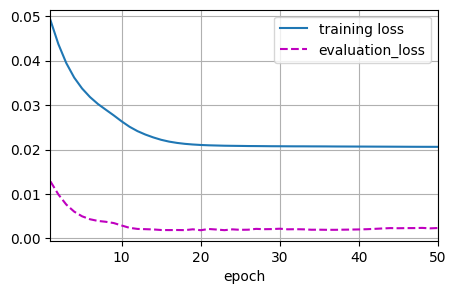

In [18]:
model.start_training(source=sequence_source_train,
                     target=sequence_target_train,
                     loss=nn.MSELoss(),
                     metric=nn.MSELoss(),
                     epochs=50,
                     batch_size=64,
                     learning_rate=1e-3,
                     standardize=False,
                     verbose=False,
                     plot=True)

In [34]:
sequence_target_test[0, pred_window*(i+1):pred_window*(i+2)]

array([-1.83644505, -0.98362166, -1.18408061, -2.12126044, -1.45412028])

In [35]:
l = np.shape(sequence_source_test)[1]
y_hat = np.zeros((1,l))
y = np.zeros((1,l))
for i in range(l//pred_window):
    x = sequence_source_test[:, pred_window*i:pred_window*(i+1)]
    y[0, pred_window*i:pred_window*(i+1)] = sequence_target_test[0, pred_window*(i+1):pred_window*(i+2)]
    y_hat[0, pred_window*i:pred_window*(i+1)] = model.predict(x, False)
plt.plot(y_hat[0])
plt.plot(y[0])
plt.show()

RuntimeError: Tensors must have same number of dimensions: got 3 and 2

In [ ]:
import torch
test = torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [ ]:
test-1